In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_excel('datasetProf.xlsx',index_col=0,parse_dates=True)
df.sort_values(by=['Date'], inplace = True)
df=df.dropna()
df=df.drop(axis=1,labels="Time")
df.head()

,Bolus Volume Delivered (U),Sensor Glucose (mg/dL),ISIG Value
Date,,,
2022-02-01,0.150,185.0,33.11
2022-02-01,0.000,175.0,31.92
2022-02-01,0.075,179.0,32.39
2022-02-01,0.175,182.0,32.63
2022-02-01,0.175,186.0,32.92


In [2]:
#eliminazioni anomalie
from numpy import percentile

q25, q75 = percentile(df, 25), percentile(df, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

print(lower)
print(upper)

df=df.loc[df['Sensor Glucose (mg/dL)']>lower]
df=df.loc[df['Sensor Glucose (mg/dL)']<upper]

df.head()

-151.0625
252.2375


,Bolus Volume Delivered (U),Sensor Glucose (mg/dL),ISIG Value
Date,,,
2022-02-01,0.150,185.0,33.11
2022-02-01,0.000,175.0,31.92
2022-02-01,0.075,179.0,32.39
2022-02-01,0.175,182.0,32.63
2022-02-01,0.175,186.0,32.92


In [3]:
import datetime

start_train = datetime.datetime(2022, 2, 1,0,0)
end_train = datetime.datetime(2022, 3, 15, 0, 0)
start_test = datetime.datetime(2022, 3, 16,0,0)
end_test = datetime.datetime(2022, 4, 5, 0, 0)

#Prendiamo i dati necessari per il training
df_train=df.loc[start_train:end_train]
X_train=df_train.drop("Sensor Glucose (mg/dL)", axis=1).values
Y_train=df_train["Sensor Glucose (mg/dL)"].values

#Prendiamo i dati necessari per il testing
df_test=df.loc[start_test:end_test]
X_test=df_test.drop("Sensor Glucose (mg/dL)", axis=1).values
Y_test=df_test["Sensor Glucose (mg/dL)"].values

Errore: 405.10857348160044
Score: 0.7296791655992292


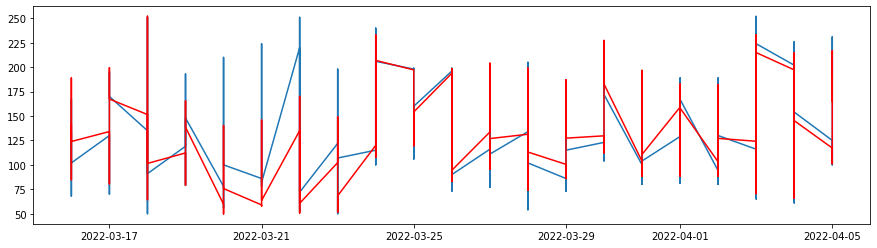

In [4]:
from sklearn.linear_model import Lasso
pipe=make_pipeline(StandardScaler(), Lasso(alpha=0.01))
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
errore = mean_squared_error(Y_test, Y_pred)
print("Errore:", errore)
punteggio = r2_score(Y_test, Y_pred)
print("Score:", punteggio)
plt.figure().set_figwidth(15)
plt.plot(df_test.index,Y_test)
plt.plot(df_test.index,Y_pred,color='red')

In [5]:
#A questo punto vediamolo considerando anche l'ora del giorno così da avere un grafico più preciso:

df = pd.read_excel('datasetProf.xlsx')
df=df.dropna() #toglie le righe dove ci sono ISIG o GLICEMIA nulli
df["timestamp"]=df['Date'].astype(str) +" "+ df["Time"].astype(str)
df=df.drop(axis=1,labels="Date")
df=df.drop(axis=1,labels="Time")
df.set_index("timestamp",drop=True,inplace=True)
df.sort_values(by=['timestamp'], inplace = True)
df.index = pd.to_datetime(df.index)

from numpy import percentile

q25, q75 = percentile(df, 25), percentile(df, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

print(lower)
print(upper)

df=df.loc[df['Sensor Glucose (mg/dL)']>lower]
df=df.loc[df['Sensor Glucose (mg/dL)']<upper]

df.head()

-151.0625
252.2375


,Bolus Volume Delivered (U),Sensor Glucose (mg/dL),ISIG Value
timestamp,,,
2022-02-01 23:05:00,0.150,185.0,33.11
2022-02-01 23:10:01,0.175,186.0,32.84
2022-02-01 23:15:00,0.150,186.0,32.81
2022-02-01 23:20:09,0.230,187.0,33.16
2022-02-01 23:25:01,0.175,189.0,33.45


In [6]:
import datetime

start_train = datetime.datetime(2022, 2, 1,0,0)
end_train = datetime.datetime(2022, 3, 15, 23, 59)
start_test = datetime.datetime(2022, 3, 16,0,0)
end_test = datetime.datetime(2022, 4, 5, 23, 59)

#Prendiamo i dati necessari per il training
df_train=df.loc[start_train:end_train]
X_train=df_train.drop("Sensor Glucose (mg/dL)", axis=1).values
Y_train=df_train["Sensor Glucose (mg/dL)"].values

#Prendiamo i dati necessari per il testing
df_test=df.loc[start_test:end_test]
X_test=df_test.drop("Sensor Glucose (mg/dL)", axis=1).values
Y_test=df_test["Sensor Glucose (mg/dL)"].values

oneDay_start=datetime.datetime(2022,4,4,0,0)
oneDay_end=datetime.datetime(2022,4,4,23,59)
df_One=df.loc[oneDay_start:oneDay_end] #mi serve per la lunghezza dell'ultimo giorno

lastDayStart=datetime.datetime(2022,4,5,0,0)
lastDayEnd=datetime.datetime(2022,4,5,23,59)
df_Last=df.loc[lastDayStart:lastDayEnd]

Y_One=df_One["Sensor Glucose (mg/dL)"].values
lengthOne=len(Y_One) #numero di osservazioni penultimo giorno (ovvero il giorno che voglio osservare)
lengthLast=len(df_Last) #numero di osservazioni l'ultimo giorno

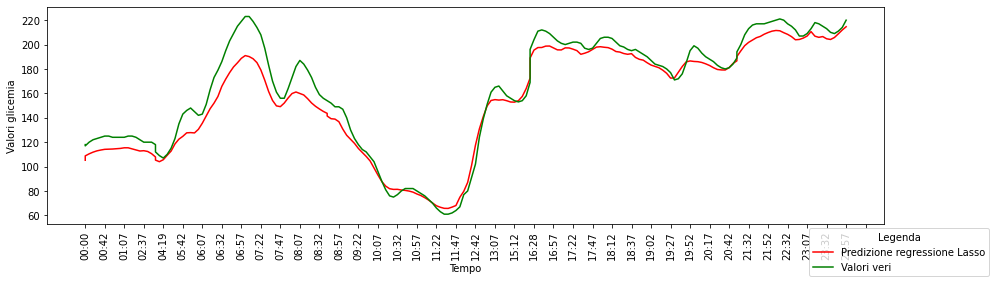

In [7]:
#Previsione giornaliera Lasso
pipe=make_pipeline(StandardScaler(), Lasso(alpha=0.01))
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)

Y_predOneLasso=Y_pred[(len(Y_pred)-lengthLast-lengthOne):(len(Y_pred)-lengthLast)] 

fig=plt.figure()
fig.set_figwidth(15)
labels = df_One.index.strftime('%H:%M')
plt.plot(labels,Y_predOneLasso,color='red',label="Predizione regressione Lasso")
plt.plot(labels,Y_One,color='green',label="Valori veri")
plt.xlabel('Tempo')
plt.ylabel('Valori glicemia')
plt.xticks(rotation=90) 
plt.xticks(np.arange(0, len(labels), 5))
fig.legend(loc="lower right",fontsize='medium',title="Legenda")